In [1]:
import os
import sys
import math
import argparse
import numpy as np
from collections import Counter

# Keras imports
from keras.models import Model
from keras import backend as K

# ML4CVD Imports
from ml4cvd.arguments import parse_args
from ml4cvd.models import make_multimodal_multitask_model, train_model_from_generators
from ml4cvd.tensor_generators import TensorGenerator, big_batch_from_minibatch_generator, test_train_valid_tensor_generators

# IPython imports
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '


In [2]:
def gradients_from_output(args, model, output_layer, output_index):
    K.set_learning_phase(1)
    input_tensor = model.input
    x = model.get_layer(output_layer).output[:,output_index]
    grads = K.gradients(x, input_tensor)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-6) # normalization trick: we normalize the gradient
    iterate = K.function([input_tensor], [x, grads])
    return iterate

def saliency_map(input_tensor, model, output_layer, output_index):
    get_gradients = gradients_from_output(args, model, output_layer, output_index)
    activation, grads = get_gradients([input_tensor])
    print('Activation is:', activation, 'gradient shape:', grads.shape)
    return grads


In [ ]:
sys.argv = ['train', 
            '--tensors', '/mnt/disks/sax-lax-40k-lvm/2019-11-21/', 
            '--input_tensors', 't2_flair_brain_30_slices', 
            '--output_tensors', 'age_2',
            '--batch_size', '4',
            '--test_steps', '2',
            '--model_file', '/home/sam/ml/trained_models/t2_flair_brain_age_converge/t2_flair_brain_age_converge.hd5',
            '--id', 'brain_age']

args = parse_args()
_, _, generate_test = test_train_valid_tensor_generators(**args.__dict__)
model = make_multimodal_multitask_model(**args.__dict__)
test_data, test_labels, test_paths = big_batch_from_minibatch_generator(generate_test, args.test_steps)

2019-12-06 17:30:11,852 - logger:25 - INFO - Logging configuration was loaded. Log messages can be found at ./recipes_output/brain_age/log_2019-12-06_17-30_0.log.
2019-12-06 17:30:11,854 - arguments:197 - INFO - Command Line was:

./scripts/tf.sh train --tensors /mnt/disks/sax-lax-40k-lvm/2019-11-21/ --input_tensors t2_flair_brain_30_slices --output_tensors age_2 --batch_size 4 --test_steps 2 --model_file /home/sam/ml/trained_models/t2_flair_brain_age_converge/t2_flair_brain_age_converge.hd5 --id brain_age



2019-12-06 17:30:11,855 - arguments:198 - INFO - Total TensorMaps:336 Arguments are Namespace(activation='relu', aligned_dimension=16, alpha=0.5, app_csv=None, b_slice_force=None, balance_csvs=[], batch_size=4, bigquery_credentials_file='/mnt/ml4cvd/projects/jamesp/bigquery/bigquery-viewer-credentials.json', bigquery_dataset='broad-ml4cvd.ukbb7089_r10data', block_size=3, cache_size=500000000.0, categorical_field_ids=[], continuous_field_ids=[], conv_bn=False, conv_dilate=False, co

2019-12-06 17:30:16,544 - tensor_generators:110 - INFO - Starting test_worker_0.
2019-12-06 17:30:16,547 - tensor_generators:234 - INFO - test_worker_0 initialized cache of size 0.495 GB.
2019-12-06 17:30:16,586 - tensor_generators:110 - INFO - Starting test_worker_1.
2019-12-06 17:30:16,599 - tensor_generators:234 - INFO - test_worker_1 initialized cache of size 0.495 GB.
2019-12-06 17:30:16,632 - tensor_generators:110 - INFO - Starting test_worker_2.
2019-12-06 17:30:16,644 - tensor_generators:234 - INFO - test_worker_2 initialized cache of size 0.495 GB.
2019-12-06 17:30:16,678 - tensor_generators:110 - INFO - Starting test_worker_3.
2019-12-06 17:30:16,690 - tensor_generators:234 - INFO - test_worker_3 initialized cache of size 0.495 GB.
2019-12-06 17:30:16,723 - tensor_generators:110 - INFO - Starting test_worker_4.
2019-12-06 17:30:16,737 - tensor_generators:234 - INFO - test_worker_4 initialized cache of size 0.495 GB.
2019-12-06 17:30:16,771 - tensor_generators:110 - INFO - Sta

Process test_worker_2:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


2019-12-06 17:31:23,663 - tensor_generators:301 - INFO - Worker test_worker_1 - In true epoch 1:
	The following errors occurred:
		[KeyError: "Unable to open object (object 'ukb_brain_mri' doesn't exist)"] - 460
		[KeyError: "Unable to open object (object 'T2_FLAIR_brain' doesn't exist)"] - 454
		[skipped_paths] - 2
	Generator looped & shuffled over 915 paths.
	0 tensors were presented.
	The cache holds 0 out of a possible 1830 tensors and is 0% full.
	So far there have been 0 cache hits.
	2 paths were skipped because they previously failed.
	67.07 seconds elapsed.


Process test_worker_1:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


2019-12-06 17:31:24,136 - tensor_generators:301 - INFO - Worker test_worker_6 - In true epoch 1:
	The following errors occurred:
		[KeyError: "Unable to open object (object 'T2_FLAIR_brain' doesn't exist)"] - 463
		[KeyError: "Unable to open object (object 'ukb_brain_mri' doesn't exist)"] - 450
		[skipped_paths] - 2
	Generator looped & shuffled over 914 paths.
	0 tensors were presented.
	The cache holds 0 out of a possible 1828 tensors and is 0% full.
	So far there have been 0 cache hits.
	2 paths were skipped because they previously failed.
	67.32 seconds elapsed.


Process test_worker_6:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


2019-12-06 17:31:24,429 - tensor_generators:301 - INFO - Worker test_worker_7 - In true epoch 1:
	The following errors occurred:
		[KeyError: "Unable to open object (object 'ukb_brain_mri' doesn't exist)"] - 461
		[KeyError: "Unable to open object (object 'T2_FLAIR_brain' doesn't exist)"] - 452
		[skipped_paths] - 2
	Generator looped & shuffled over 914 paths.
	0 tensors were presented.
	The cache holds 0 out of a possible 1828 tensors and is 0% full.
	So far there have been 0 cache hits.
	2 paths were skipped because they previously failed.
	67.56 seconds elapsed.


Process test_worker_7:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


2019-12-06 17:31:25,038 - tensor_generators:301 - INFO - Worker test_worker_4 - In true epoch 1:
	The following errors occurred:
		[KeyError: "Unable to open object (object 'T2_FLAIR_brain' doesn't exist)"] - 481
		[KeyError: "Unable to open object (object 'ukb_brain_mri' doesn't exist)"] - 432
		[skipped_paths] - 2
	Generator looped & shuffled over 914 paths.
	0 tensors were presented.
	The cache holds 0 out of a possible 1828 tensors and is 0% full.
	So far there have been 0 cache hits.
	2 paths were skipped because they previously failed.
	68.31 seconds elapsed.


Process test_worker_4:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


2019-12-06 17:31:25,251 - tensor_generators:301 - INFO - Worker test_worker_0 - In true epoch 1:
	The following errors occurred:
		[KeyError: "Unable to open object (object 'ukb_brain_mri' doesn't exist)"] - 476
		[KeyError: "Unable to open object (object 'T2_FLAIR_brain' doesn't exist)"] - 438
		[skipped_paths] - 2
	Generator looped & shuffled over 915 paths.
	0 tensors were presented.
	The cache holds 0 out of a possible 1830 tensors and is 0% full.
	So far there have been 0 cache hits.
	2 paths were skipped because they previously failed.
	68.71 seconds elapsed.


Process test_worker_0:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


2019-12-06 17:31:26,008 - tensor_generators:301 - INFO - Worker test_worker_3 - In true epoch 1:
	The following errors occurred:
		[KeyError: "Unable to open object (object 'ukb_brain_mri' doesn't exist)"] - 474
		[KeyError: "Unable to open object (object 'T2_FLAIR_brain' doesn't exist)"] - 439
		[skipped_paths] - 2
	Generator looped & shuffled over 914 paths.
	0 tensors were presented.
	The cache holds 0 out of a possible 1828 tensors and is 0% full.
	So far there have been 0 cache hits.
	2 paths were skipped because they previously failed.
	69.33 seconds elapsed.


Process test_worker_3:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


2019-12-06 17:31:26,488 - tensor_generators:301 - INFO - Worker test_worker_5 - In true epoch 1:
	The following errors occurred:
		[KeyError: "Unable to open object (object 'T2_FLAIR_brain' doesn't exist)"] - 468
		[KeyError: "Unable to open object (object 'ukb_brain_mri' doesn't exist)"] - 445
		[skipped_paths] - 2
	Generator looped & shuffled over 914 paths.
	0 tensors were presented.
	The cache holds 0 out of a possible 1828 tensors and is 0% full.
	So far there have been 0 cache hits.
	2 paths were skipped because they previously failed.
	69.71 seconds elapsed.


Process test_worker_5:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 319, in multiprocessing_worker
    self._on_epoch_end()
  File "/usr/local/lib/python3.6/dist-packages/ml4cvd/tensor_generators.py", line 303, in _on_epoch_end
    raise ValueError(f"Completed an epoch but did not find any tensors to yield")
ValueError: Completed an epoch but did not find any tensors to yield


In [ ]:
def plot_brain(brain, cols=3, rows=10):
    _, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
    vmin = np.min(brain)
    vmax = np.max(brain)
    for i in range(test_tensor.shape[-1]):
        axes[i//cols, i%cols].imshow(brain[:, :, i], cmap='gray', vmin=vmin, vmax=vmax)
        axes[i//cols, i%cols].set_yticklabels([])
        axes[i//cols, i%cols].set_xticklabels([])    

In [ ]:
test_tensor = test_data['input_t2_flair_brain_30_slices_ukb_brain_mri']
print(test_tensor.shape, test_tensor[:1].shape)
plot_brain(test_tensor[0])

In [ ]:
grads = saliency_map(test_tensor[:6], model, 'output_21003_Age-when-attended-assessment-centre_2_continuous', 0)
plot_brain(grads[0])

In [ ]:
plot_brain(test_tensor[1])

In [ ]:
plot_brain(grads[1])

In [ ]:
plot_brain(np.ma.masked_where(grads[0] < -5, test_tensor[0]))

In [ ]:
plot_brain(np.ma.masked_where(grads[1]) > 3, test_tensor[1]))

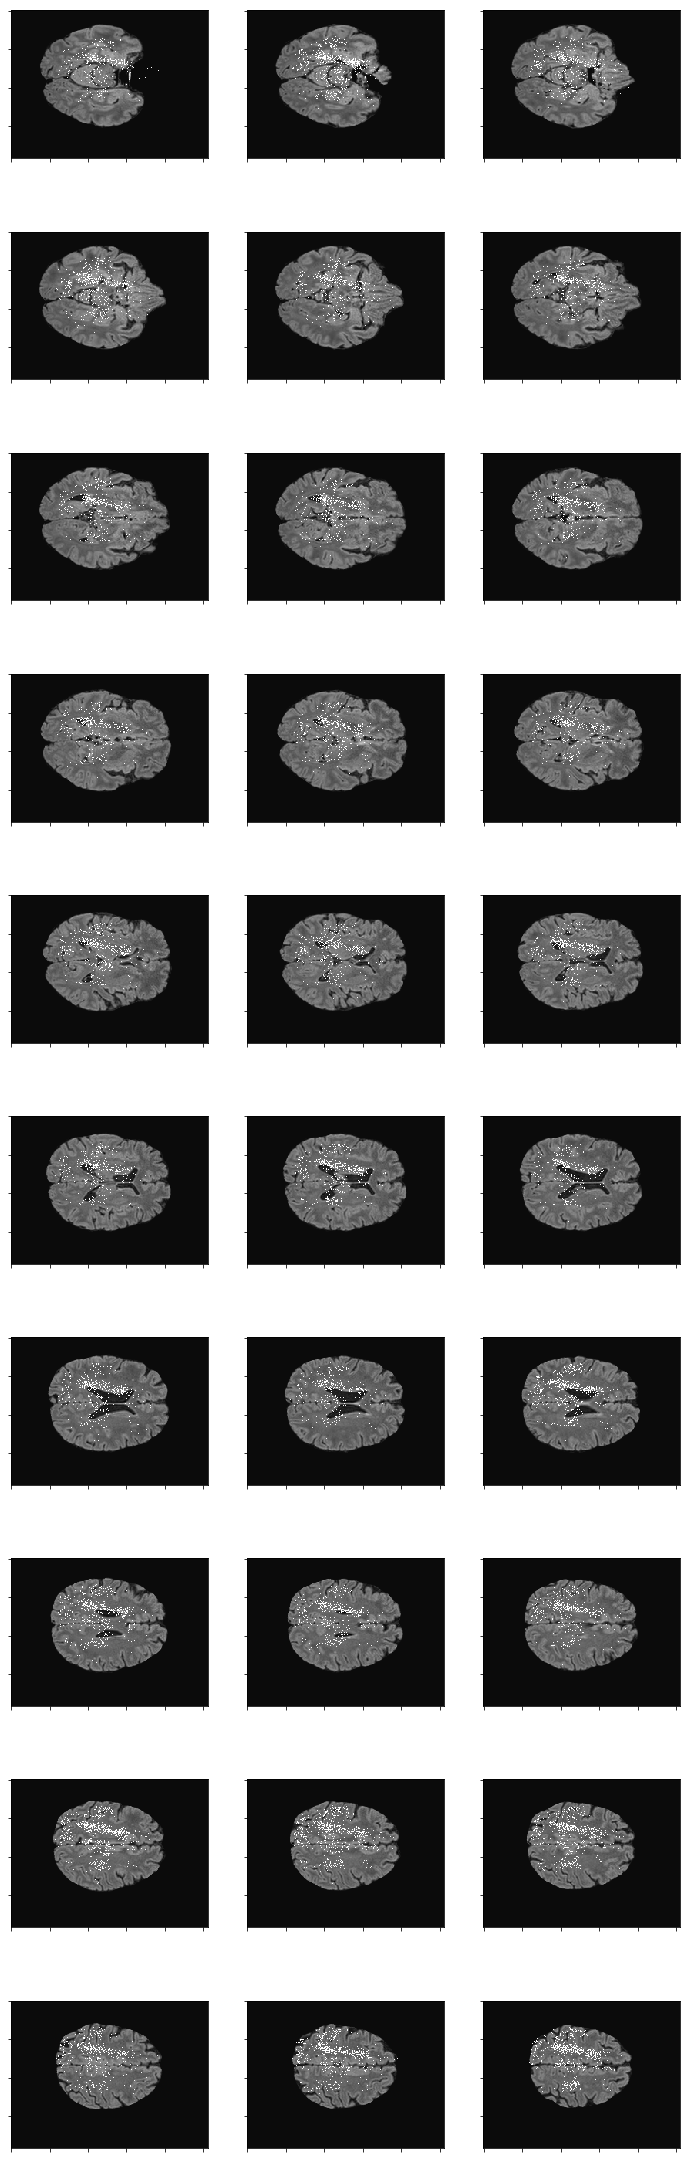

In [56]:
plot_brain(np.ma.masked_where(np.abs(grads[3]) > 5, test_tensor[3]))

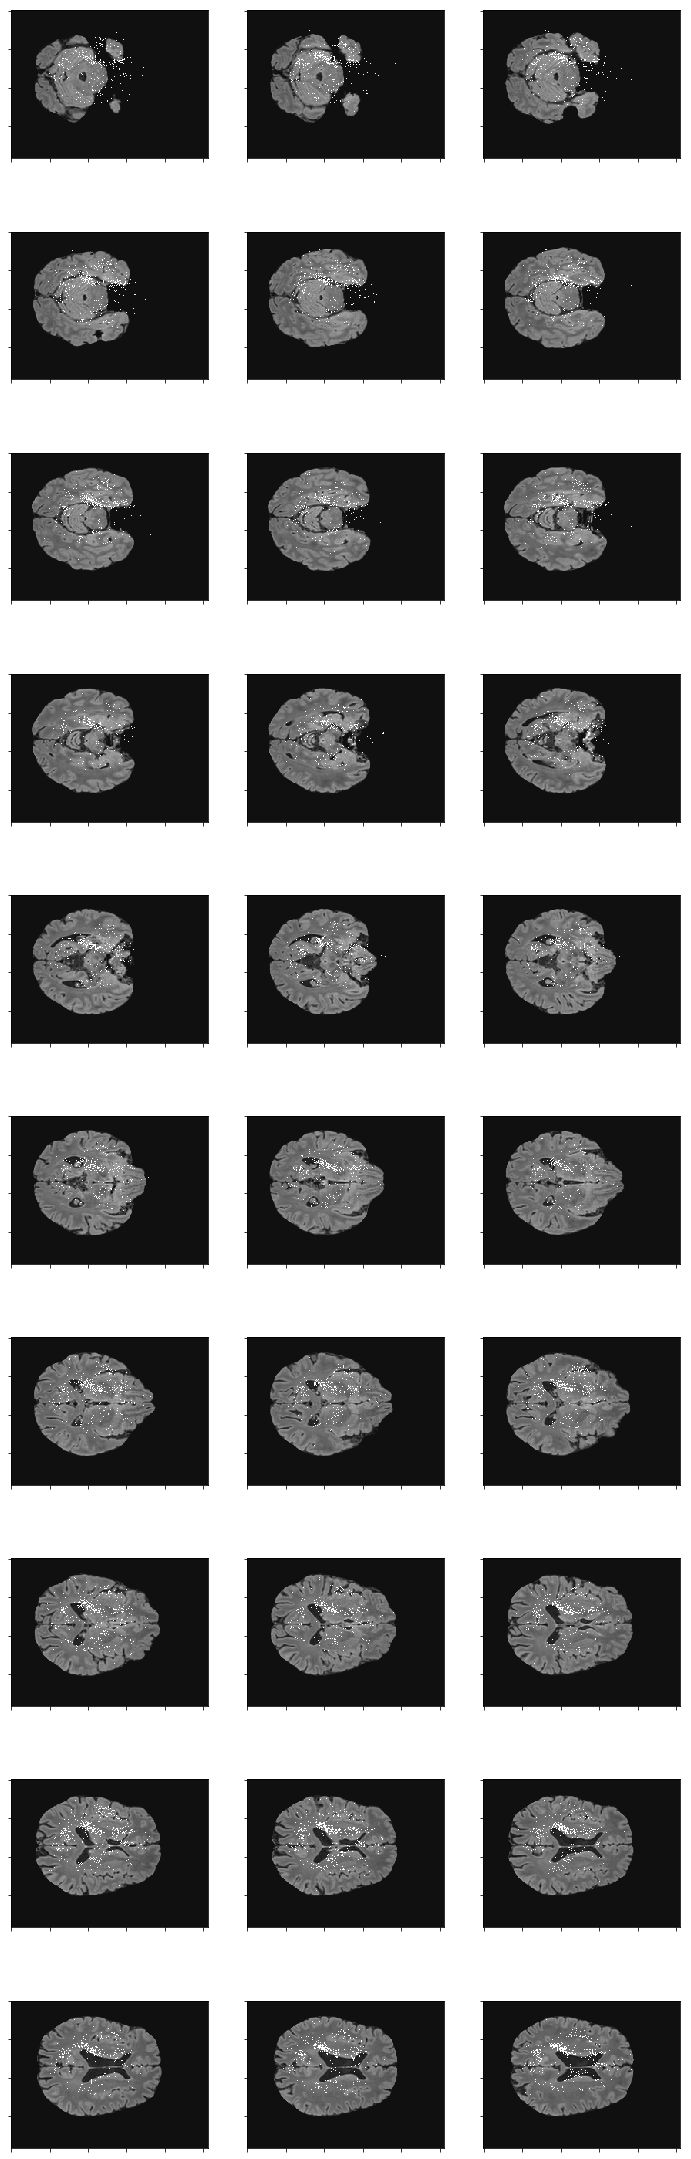

In [57]:
plot_brain(np.ma.masked_where(np.abs(grads[2]) > 5, test_tensor[2]))

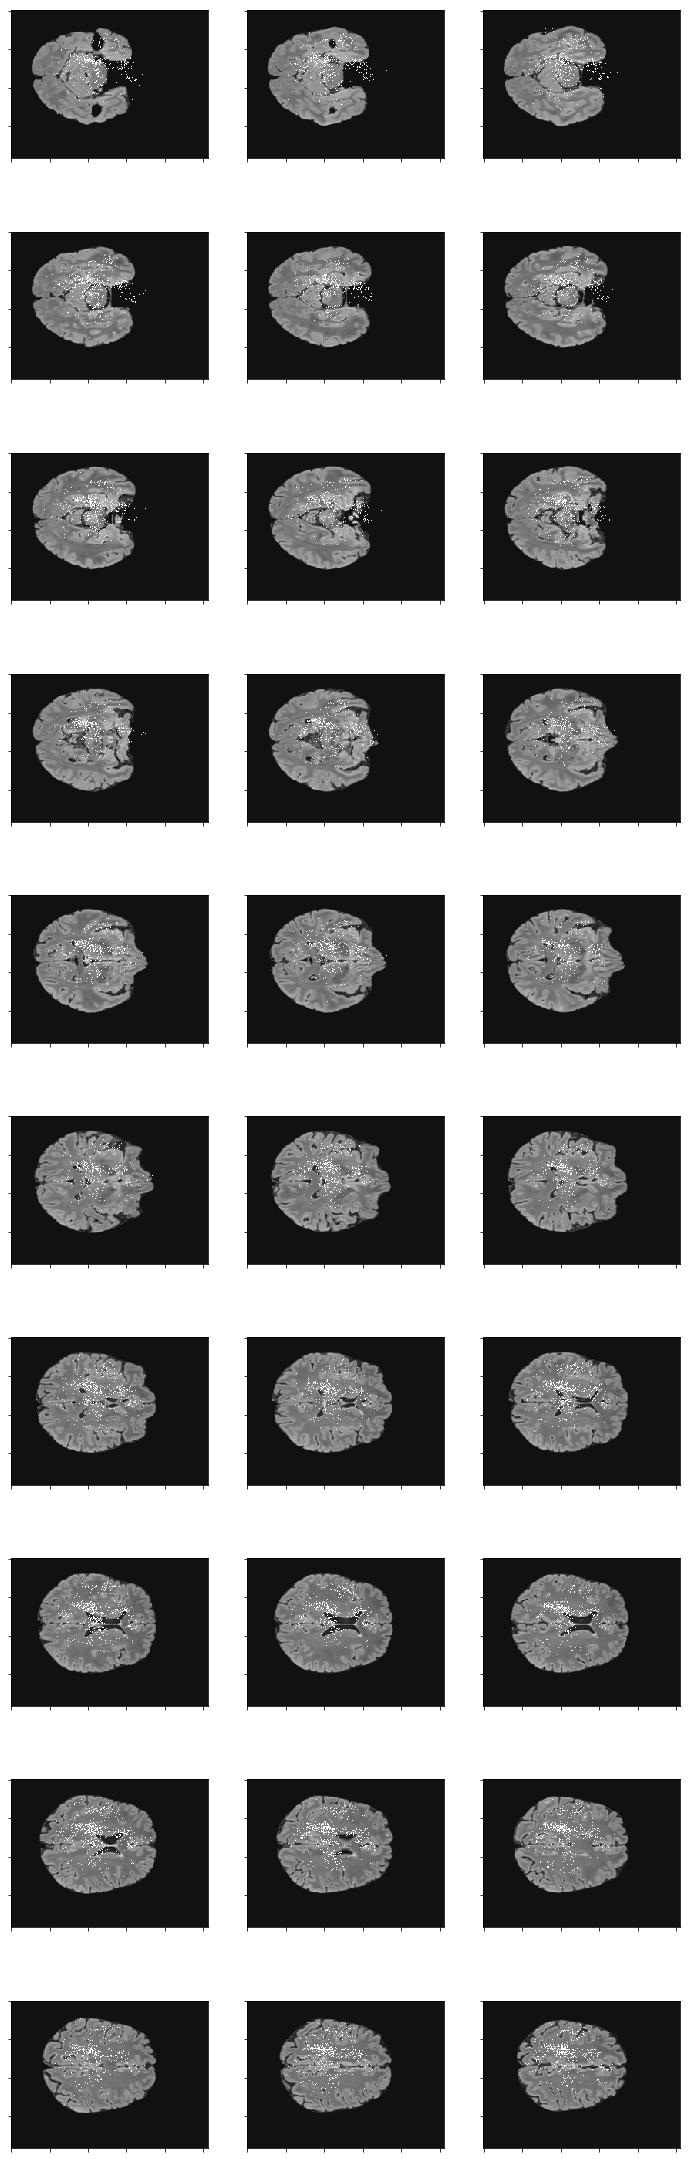

In [58]:
plot_brain(np.ma.masked_where(np.abs(grads[4]) > 5, test_tensor[4]))

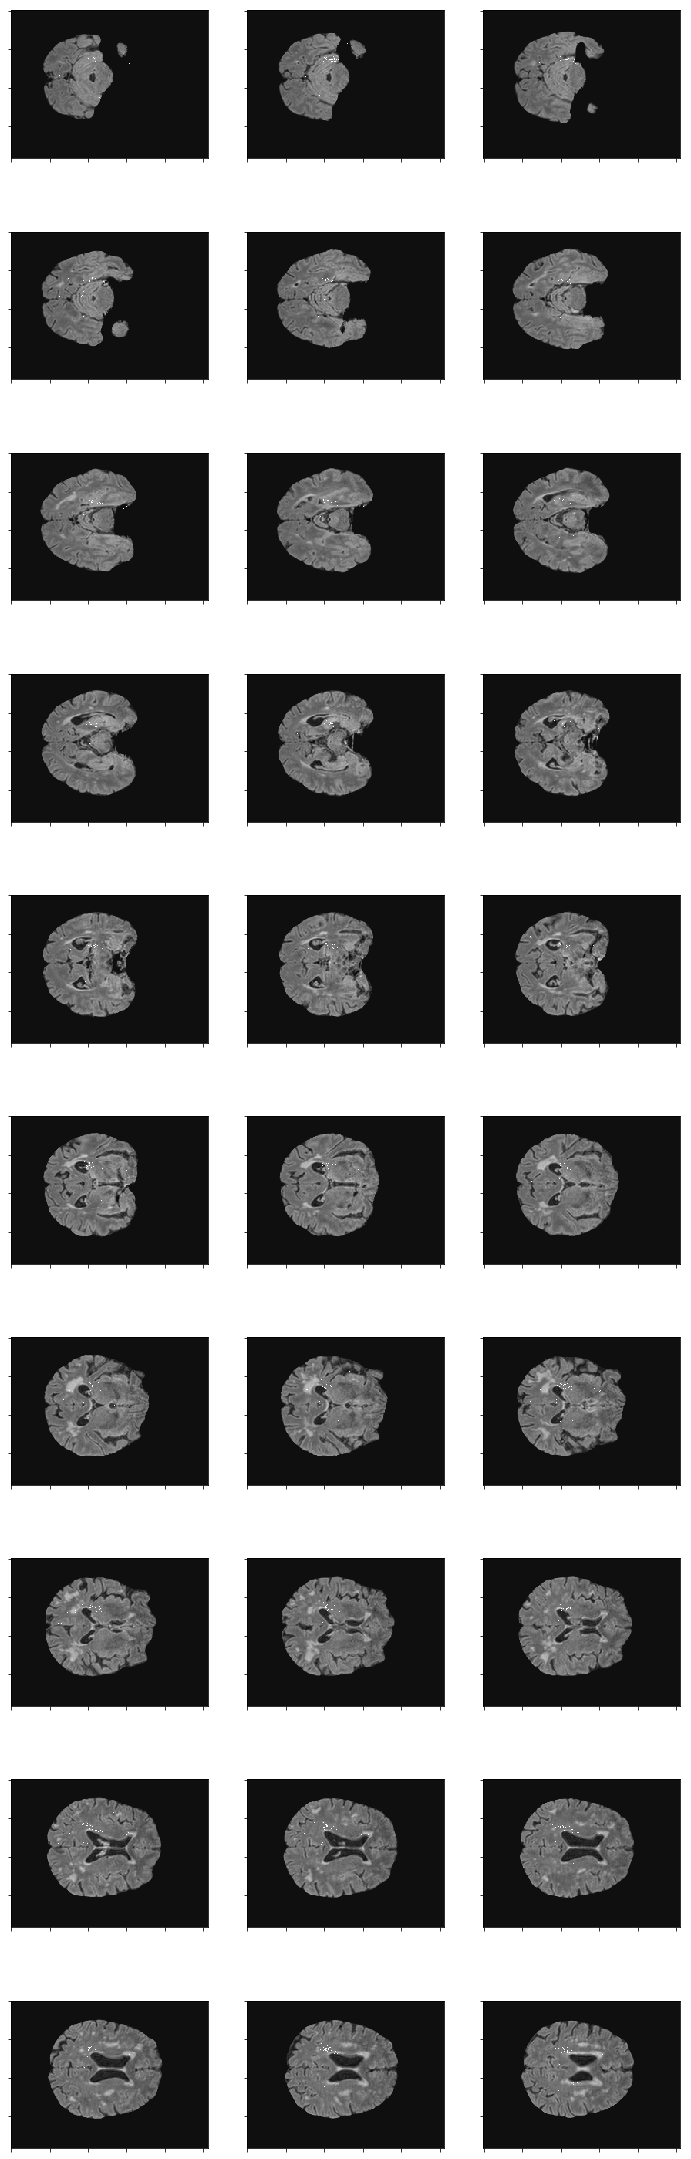

In [60]:
plot_brain(np.ma.masked_where(np.abs(grads[5]) > 3, test_tensor[5]))

- do this with hyperintensity
- ventricular volumes
- volumes
- move the window up less stem